# Combining different binning schemes in $B$ decays: the simple case

This is a set of simplified toy studies, that emulate a problem relevant to measurements of matter-anti-matter asymmetries in High Energy Particle Physics. In it's simplest version, the problem boils down to this: we want to measure a specific obervable (or set of observables), $x$, from a sample of a type of particle decays, $S_x$. For each decay, a number of properties are measured. This measurement is based on the sample distribution of a specific property, namely the coordinate $s$ of the decay in the "$D$-decay phase space $P$". We done the probability-density of $s$ over $P$ by $f_{S_x}(s)$. The distribution depends on $x$, and thus $x$ can be measured in ML-fits of decay samples. 

In actual measurement $S_x$ is a sample of reconstructed $B^\pm\to D(\to K_S^0\pi^+\pi^-)K^\pm$ decays, $P$ is the 2-dimensional phase-space of the three-body $D$ decay, and $x$ is a set of four different observables. However, for illustrating the underlying problem, we will look at a simple case where $P$ is the 1-dimensional interval $P=[-1, 1]$, and $x$ denotes a single observable. We take $f_{S_x}$ to be

$$
f_{S_x}(s) \propto f(s) + x^2 f(-s) + \sqrt{f(s)f(-s)}c(s)x
$$

which depends on two functions: $f(s)$ which can be any positive function on $s\in[-1, 1]$ and $c(s)$ which takes values in $[-1, 1]$ and is symmetric around $s=0$. These constraints are motivated by the properties of what $f$ and $c$ corresponds to in the full, physical measurement setup.

Extracting $x$ from the sample $S_x$ obviously requires knowledge of $f(s)$ and $c(s)$. This is achieved by access to two other samples of particle decays, $S_f$ and $S_c$, for which the the coordinate $s$ has different distributions over $P$:

$$
f_{S_f}(s)\propto f(s) \\
f_{S_c}(s)\propto f(s) + f(-s) + \sqrt{f(s)f(-s)}c(s)
$$

In practice we can take the $S_f$ sample to be so large that $f(s)$ can be considered well-known. However, this is not the case for $c(s)$, which can only be accessed in small data samples. One could fit $c(s)$ to a specific functional form, but this introduces a model-dependence into the measurement that should be avoided for a number of good reasons. 
Therefore a approach has been developed that completely avoids making assumptions on the functional forms of $f(s)$ and $c(s)$. In this approach $P$ is divided into a set of $\mathcal 2N$ bins, symmetric around $s=0$. Then the yields in each bin, for each of the samples are

$$
N^x_i \propto F_i + x^2 F_{-i}+\sqrt{F_iF_{-i}}c_ix 
$$

$$
N^c_i \propto F_i +  F_{-i}+\sqrt{F_iF_{-i}}c_i
$$

$$
N^f_i \propto F_i  
$$

in terms of the integrals :
$$
F_i = \int_i ds f(s) \\
c_i = \int_i ds \frac{\sqrt{f(s)f(-s)}c(s)}{\sqrt{F_iF_{-i}}}
$$
where $\int_i$ denotes integration over bin $i$ of $P$.

Thus $x$ can be obtained from looking at only the yields in each bin, and extracted from $S_x$ if $F_i$ and $c_i$ have been determined in the two control samples $S_f$ and $S_c$. The choice of binning is in principle arbitrary, but different choices can lead to worse or better sensitivity to $x$, as it is shown below.

### Aim of present study
The question investigated here is: what is we measure $x$ in *several* binning schemes, obtaining $x_1, x_2, ...$, and combine the measurements?

This notebook answers two questions:
1. can this lead to improved performance?
2. can the necessary correlations between $x_1, x_2, ...$ be obtained in a single data sample by bootstrapping?

These first studies assumes $c(s)$ to be perfectly known and use more or less arbitrary binning-schemes. Other notebooks look into
1. how to choose the best binning schemes?
2. how to take into account correlations between the $c_i$ that are measured in one dataset for different binning schemes

## Study:

In [1]:
from combine_bins import test_F_1 as F
from combine_bins import test_c_1 as c

In [2]:
import autograd.numpy as np
ss = np.linspace(-1, 1, 100)
import matplotlib.pyplot as plt
%matplotlib inline

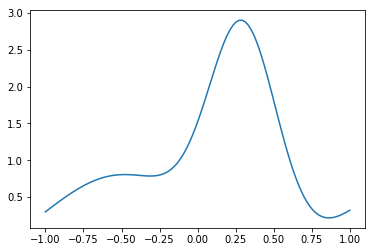

In [3]:
plt.plot(ss, F(ss))

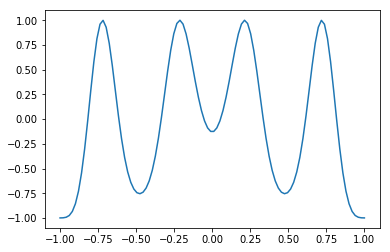

In [4]:
plt.plot(ss, c(ss))

In [5]:
from importlib import reload
from combine_bins import Amp_p, Amp_m, Amp_c


In [6]:
Ap = Amp_p(F, c, 0.3)
Am = Amp_m(F, c, -0.2)
Ac = Amp_c(F, c)

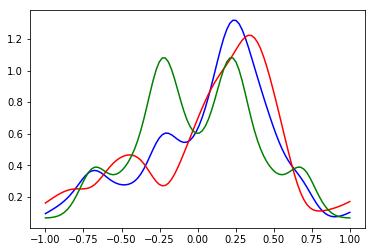

In [7]:
plt.plot(ss, Ap.pdf(ss), 'b')
plt.plot(ss, Am.pdf(-ss), 'r')
plt.plot(ss, Ac.pdf(ss), 'g')

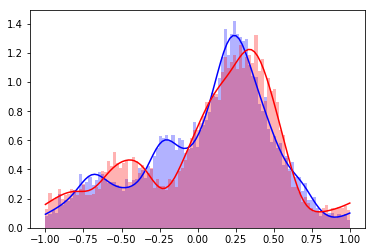

In [8]:
bins=np.linspace(-1, 1, 100)
plt.hist(Ap.generate(10000), density=True, bins=bins, color='b', alpha=0.3)
plt.plot(ss, Ap.pdf(ss), 'b')
plt.hist(-Am.generate(10000), density=True, bins=bins, color='r', alpha=0.3)
plt.plot(ss, Am.pdf(-ss), 'r')

## The model-dependent fit

Mean pull: -0.05425198901866048
Pull std: 0.9687830392501654
Mean uncertainty: 0.015744444629682317


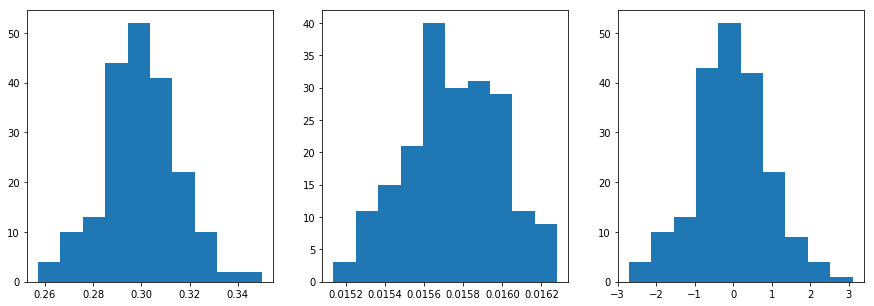

In [9]:
vs = []
ps = []
us = []

import warnings
warnings.filterwarnings('ignore')

datasets = []
for i in range(200):
    data = Ap.generate(10000)
    datasets.append(data)
    res = Ap.fit(data)
    vs.append(res.x[0])
    us.append(res.x_unc[0])
    ps.append((vs[-1]-0.3)/us[-1])
    
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(vs)
ax[1].hist(us)
ax[2].hist(ps)
print (f'Mean pull: {np.mean(ps)}')
print (f'Pull std: {np.std(ps)}')

print (f'Mean uncertainty: {np.mean(us)}')

## The binned fits

In [10]:
from combine_bins.util import get_F_c

In [11]:
from combine_bins import BinnedFitter 

In [12]:
# Naive binning: 3(x2) uniform bins in $s$

import combine_bins.binnings as binnings

simple_binning = binnings.simple_binning
simple_Fs, simple_cs = get_F_c(Ap, simple_binning)

bf_simple = BinnedFitter(simple_binning, simple_Fs, simple_cs)
bf_simple.get_bin_yields(data)
bf_simple.fit(data)

        H: array([[2536.39190486]])
  cov_mat: array([[0.00039426]])
      fun: 3.2929819557275053
 hess_inv: array([[0.00039407]])
      jac: array([-5.12599945e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([0.32645964])
    x_unc: array([0.019856])

In [13]:
vs_simple = []
ps_simple = []
us_simple = []

import warnings
warnings.filterwarnings('ignore')

for i in range(200):
    data = datasets[i]
    res = bf_simple.fit(data)
    vs_simple.append(res.x[0])
    us_simple.append(res.x_unc[0])
    ps_simple.append((vs_simple[-1]-0.3)/us_simple[-1])


In [14]:
# Naive binning: 3(x2) uniform bins in $s$

equal_binning = binnings.approx_equal_binning
equal_Fs, equal_cs = get_F_c(Ap, equal_binning)

bf_equal = BinnedFitter(equal_binning, equal_Fs, equal_cs)
print(bf_equal.get_bin_yields(data))
bf_equal.fit(data)

[ 927. 1323. 1499. 2161. 1960. 2130.]


        H: array([[2147.38207238]])
  cov_mat: array([[0.00046568]])
      fun: 3.1609179336716746
 hess_inv: array([[0.00046569]])
      jac: array([-8.34465027e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.32241861])
    x_unc: array([0.0215797])

In [15]:
vs_equal = []
ps_equal = []
us_equal = []

import warnings
warnings.filterwarnings('ignore')

for i in range(200):
    data = datasets[i]
    res = bf_equal.fit(data)
    vs_equal.append(res.x[0])
    us_equal.append(res.x_unc[0])
    ps_equal.append((vs_equal[-1]-0.3)/us_equal[-1])


Mean pull: 0.019735186857295136
Pull std: 1.0107068143223563
Mean uncertainty: 0.01936067469619681


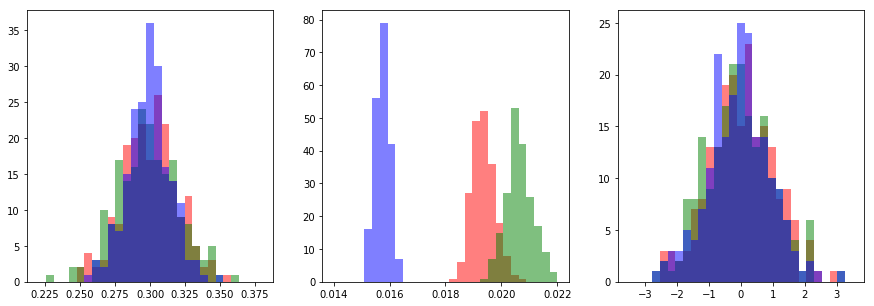

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
n_bins = 30
ax[0].hist(vs_simple, color='r', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_simple, color='r', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_simple, color='r', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs_equal, color='g', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_equal, color='g', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_equal, color='g', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs, color='b', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us, color='b', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps, color='b', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

print (f'Mean pull: {np.mean(ps_simple)}')
print (f'Pull std: {np.std(ps_simple)}')

print (f'Mean uncertainty: {np.mean(us_simple)}')

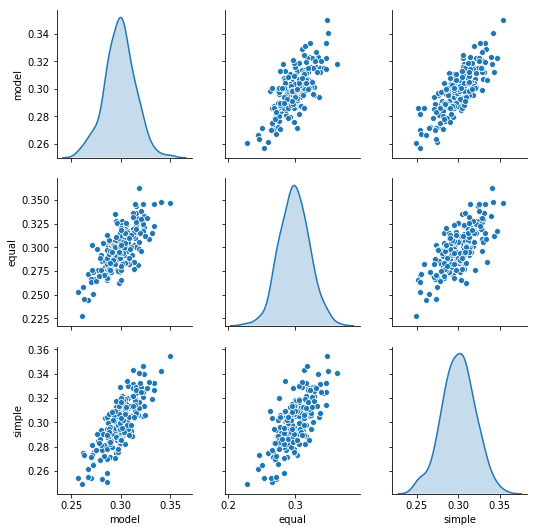

In [17]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame.from_dict({
    'model': vs,
    'equal': vs_equal,
    'simple': vs_simple
})

sns.pairplot(df, diag_kind="kde")

In [18]:
df.corr()['simple']['equal']

0.7045381469762971

## Combinining binned fits: Naively without correlations

In [19]:
def combine_measurements(x1, x2, sig1, sig2, rho, verbose=False):
    if verbose: print (f'x1  = {x1:1.3f} +- {sig1:1.3f}')
    if verbose: print (f'x2  = {x2:1.3f} +- {sig2:1.3f}')
    if verbose: print (f'rho = {rho:1.3f}')
    
    w = (sig2**2 - rho*sig1*sig2)/(sig1**2 + sig2**2 - 2*rho*sig1*sig2)
    x = w*x1 + (1 - w)*x2
    sig = np.sqrt( (1-rho**2)*(sig1**2)*(sig2**2) / (sig1**2 + sig2**2 - 2*rho*sig1*sig2) )
    if verbose: print (f'-> {x:1.3f} +- {sig:1.3f}')
    return x, sig
    

In [20]:
x, sig = combine_measurements(
    vs_simple[i], vs_equal[i],
    us_simple[i], us_equal[i],
    0, True)

x1  = 0.326 +- 0.020
x2  = 0.322 +- 0.022
rho = 0.000
-> 0.325 +- 0.015


In [21]:
simple_equal_corr = df.corr()['equal']['simple']
x, sig = combine_measurements(
    vs_simple[i], vs_equal[i],
    us_simple[i], us_equal[i],
    simple_equal_corr, True)

x1  = 0.326 +- 0.020
x2  = 0.322 +- 0.022
rho = 0.705
-> 0.325 +- 0.019


In [22]:
vs_naive_comb = []
us_naive_comb = []
ps_naive_comb = []

vs_comb = []
us_comb = []
ps_comb = []



for i in range(200):
    x, sig = combine_measurements(
        vs_simple[i], vs_equal[i],
        us_simple[i], us_equal[i],
        0)
    vs_naive_comb.append(x)
    us_naive_comb.append(sig)
    ps_naive_comb.append((x-0.3)/sig)
    
    x, sig = combine_measurements(
        vs_simple[i], vs_equal[i],
        us_simple[i], us_equal[i],
        simple_equal_corr)
    vs_comb.append(x)
    us_comb.append(sig)
    ps_comb.append((x-0.3)/sig)

Naive comb Mean pull: -0.03191294534616545
Naive comb Pull std: 1.3469782469809726

Naive comb Mean uncertainty: 0.0141172541151031

Proper comb Mean pull: -0.01394864030306437
Proper comb Pull std: 1.0302227763972658

Proper comb Mean uncertainty: 0.018382088260595973


 -- Improvement from combination:
mean sig binning 1: 0.01936067469619681
mean sig binning 2: 0.02063644527315257
mean sig comb     : 0.018382088260595973
improvement       : 1.0532358686199186
improvement 2     : 1.1226387873128136


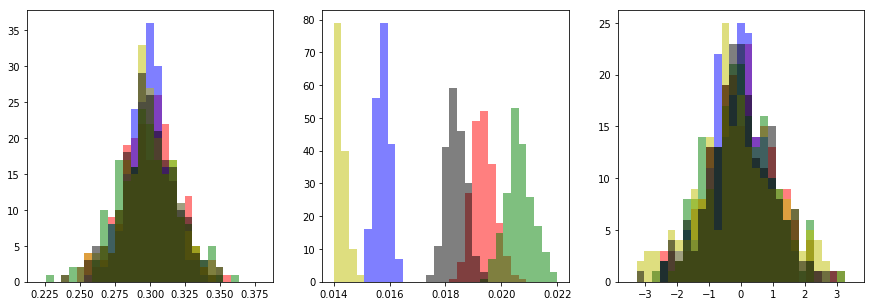

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
n_bins = 30
ax[0].hist(vs_simple, color='r', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_simple, color='r', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_simple, color='r', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs, color='b', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us, color='b', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps, color='b', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs_equal, color='g', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_equal, color='g', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_equal, color='g', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs_naive_comb, color='y', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_naive_comb, color='y', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_naive_comb, color='y', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs_comb, color='k', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_comb, color='k', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_comb, color='k', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

print (f'Naive comb Mean pull: {np.mean(ps_naive_comb)}')
print (f'Naive comb Pull std: {np.std(ps_naive_comb)}')
print (f'\nNaive comb Mean uncertainty: {np.mean(us_naive_comb)}')

print (f'\nProper comb Mean pull: {np.mean(ps_comb)}')
print (f'Proper comb Pull std: {np.std(ps_comb)}')
print (f'\nProper comb Mean uncertainty: {np.mean(us_comb)}')

print('\n\n -- Improvement from combination:')
print('mean sig binning 1:', np.mean(us_simple))
print('mean sig binning 2:', np.mean(us_equal))
print('mean sig comb     :', np.mean(us_comb))
print('improvement       :', np.mean(us_simple)/np.mean(us_comb))
print('improvement 2     :', np.mean(us_equal)/np.mean(us_comb))

It is clear that there is *some* improvement. Whether this is worth pursuing is a matter of how large that improvement can become, if we try and find binning schemes that optimise it.

However, first we have to investigate whether the proper correlation coefficient can be obtained in data.

It is clear from the above, that the final uncertainties are significantly underestimated if correlations are not handled properly (unsurprisingly)

## Correlations from data
The next question is: is it viable to get the correlations from a single data sample? In the above studies we used 200 different samples to obtain the correlation sample: this is of course impossible in a measurement. However, given a single sample, we can probably bootstrap the correlation coefficient

In [24]:
def bootstrap_correlation(
    fitter_1,
    fitter_2,
    data,
    n_bootstrap=200):
    
    vs_1 = []
    vs_2 = []
    
    for i in range(n_bootstrap):
        data_sample = np.random.choice(data, size=len(data))
        res = fitter_1.fit(data_sample)
        vs_1.append(res.x[0])
        
        res = fitter_2.fit(data_sample)
        vs_2.append(res.x[0])
        
    df = pd.DataFrame.from_dict({
        'fitter_1': vs_1,
        'fitter_2': vs_2
    })
    
    return df

In [25]:
df_b0 = bootstrap_correlation(
    bf_equal, bf_simple, datasets[0])

df_b1 = bootstrap_correlation(
    bf_equal, bf_simple, datasets[1])

df_b2 = bootstrap_correlation(
    bf_equal, bf_simple, datasets[2])

In [26]:
print(df.corr()['simple']['equal'])
print(df_b0.corr()['fitter_1']['fitter_2'])
print(df_b1.corr()['fitter_1']['fitter_2'])
print(df_b2.corr()['fitter_1']['fitter_2'])

0.7045381469762971
0.6989990862807459
0.7096180913599489
0.7229403097395485


These simple studies seem to suggest that the method does work -> the correlations are very similar to what was obtained from the completely independent datasets. Time for the big guns: a proper study:

In [27]:
vs_comb_datadriven = []
us_comb_datadriven = []
ps_comb_datadriven = []

from combine_bins.util import update_progress

num = len(datasets)
for i in range(num):
    update_progress(i/num)
    data = datasets[i]
    
    res = bf_equal.fit(data)
    x1 = res.x[0]
    sig1 = res.x_unc[0]
    
    res = bf_simple.fit(data)
    x2 = res.x[0]
    sig2 = res.x_unc[0]
    
    df_study = bootstrap_correlation(
                    bf_equal, bf_simple, data)
    rho = df_study.corr()['fitter_1']['fitter_2']
    
    x, sig = combine_measurements(x1, x2, sig1, sig2, rho)
    
    vs_comb_datadriven.append(x)
    us_comb_datadriven.append(sig)
    ps_comb_datadriven.append((x-0.3)/sig)
    


Progress: [####################] 99.5%


Datadriven comb Mean pull: -0.018486966713576986
Datadriven comb Pull std: 1.0409144719304226

Datadriven comb Mean uncertainty: 0.018238407750075555


 -- Improvement from combination:
mean sig binning 1: 0.01936067469619681
mean sig binning 2: 0.02063644527315257
mean sig comb     : 0.018238407750075555
improvement       : 1.0615331645996677
improvement 2     : 1.1314828331473772


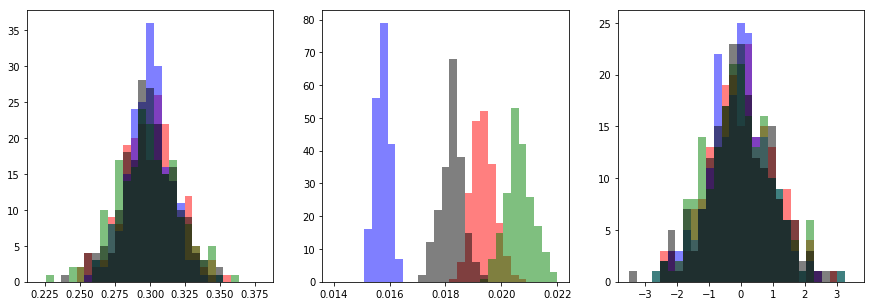

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
n_bins = 30
ax[0].hist(vs_simple, color='r', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_simple, color='r', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_simple, color='r', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs, color='b', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us, color='b', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps, color='b', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs_equal, color='g', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_equal, color='g', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_equal, color='g', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

ax[0].hist(vs_comb_datadriven, color='k', alpha=0.5, bins = np.linspace(0.22, 0.38, n_bins))
ax[1].hist(us_comb_datadriven, color='k', alpha=0.5, bins = np.linspace(0.014, 0.022, n_bins))
ax[2].hist(ps_comb_datadriven, color='k', alpha=0.5, bins = np.linspace(-3.5, 3.5, n_bins))

print (f'Datadriven comb Mean pull: {np.mean(ps_comb_datadriven)}')
print (f'Datadriven comb Pull std: {np.std(ps_comb_datadriven)}')
print (f'\nDatadriven comb Mean uncertainty: {np.mean(us_comb_datadriven)}')

print('\n\n -- Improvement from combination:')
print('mean sig binning 1:', np.mean(us_simple))
print('mean sig binning 2:', np.mean(us_equal))
print('mean sig comb     :', np.mean(us_comb_datadriven))
print('improvement       :', np.mean(us_simple)/np.mean(us_comb_datadriven))
print('improvement 2     :', np.mean(us_equal)/np.mean(us_comb_datadriven))

This is very close to what was found for the MC derived correlations (while the pull distribution sigma is 1.07 when writing this, it is found to vary with the sampled datasets by up to 0.08, when using 200 datasets, hence the uncertainties are in fact well estimated.

## Optimising the binning scheme(s)
The studies in this notebook show that some gain can be made from combining measurements in different binning schemes, and that the necessary correlation coefficient can be obtained from a single datasample via bootstrapping.

For the (arbitrary) binning schemes chosen in these studies, the gain was modest (about 5 % in the precision), however it is possible that a clever choice of binning scheme can improve significantly on this. This is investigated in a separate notebook.

## Including the uncertainty on the $c$ parameters
Another complication is that the uncertainties on the input strong phase parameters $c_i$, which in practice are significant, are **also** correlated, and hence a similar bootstrapping scheme is necessarry to extract those correlations.

Whether this is feasible and produces reliable errors will be investigated in a separate notebook.

## Computational cost
It is clear that the computational cost of making the measurement increases **significantly** by the requirement to bootstrap $N$ times: the increase is of course $O(N)$. Whether this is feasible or not, rely depends on the number of bootstrap samples needed to get reasonable pulls, on how long the fit takes to begin with, and on whether all the systematics studies will need to include the bootstrapping as well.